<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/AssNo04Q02(Salary_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/Salary_Data.csv')

# **Performing EDA**

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.shape

(30, 2)

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Data Visualization**

<Axes: >

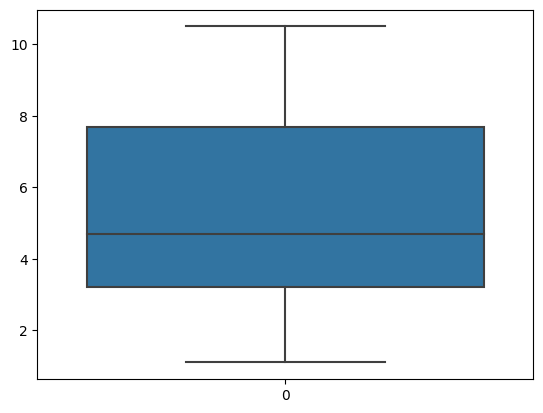

In [7]:
# Finding outliers
sns.boxplot(data.YearsExperience)

<Axes: >

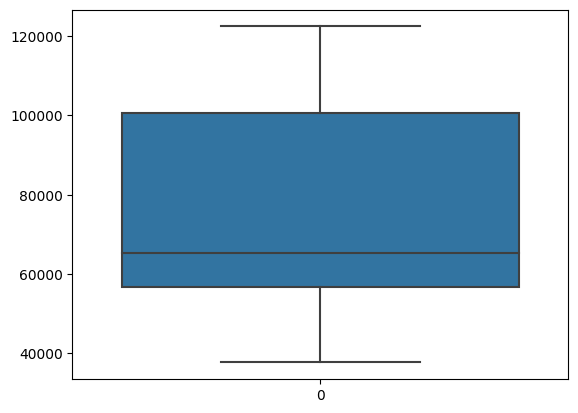

In [8]:
sns.boxplot(data.Salary)

# **Density Plot**

<ipython-input-9-fdc0ae0e508e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.YearsExperience)


<Axes: xlabel='YearsExperience', ylabel='Density'>

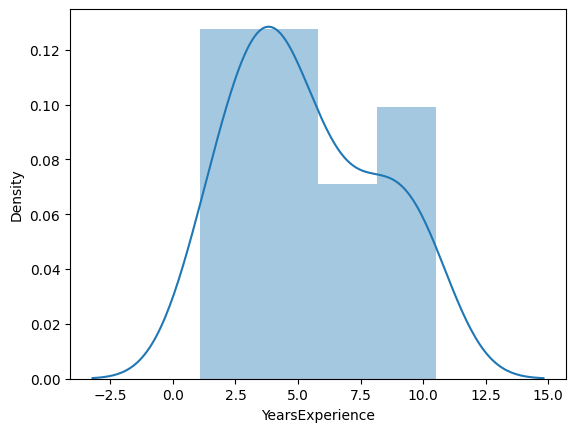

In [9]:
sns.distplot(data.YearsExperience)

<ipython-input-10-18bc49c01cc2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Salary)


<Axes: xlabel='Salary', ylabel='Density'>

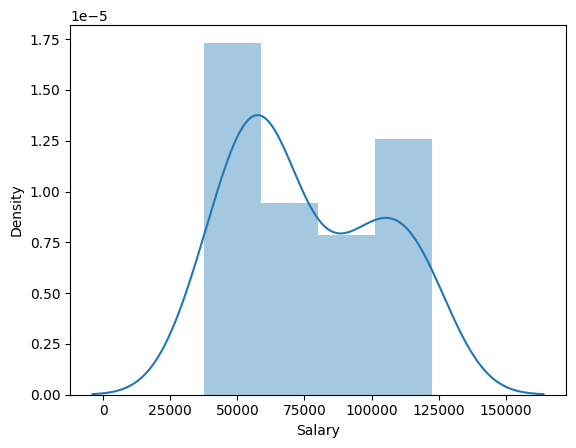

In [10]:
sns.distplot(data.Salary)

#Correlation

In [11]:
data.corr()
# strong +ve relationship

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#Fitting Linear Regression Model

In [12]:
import statsmodels.formula.api as smf

model = smf.ols("Salary~YearsExperience", data=data).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        07:39:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

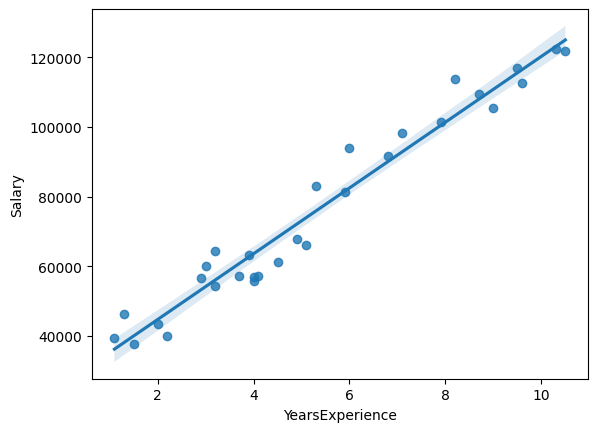

In [15]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [16]:
# Coefficients are B0=Intercept and B1=Sorting_Time
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [17]:
print("***T Values :***\n",model.tvalues,'\n\n','***P Values :***\n',model.pvalues)
# p value < alpha --> Reject Null Hypothesis

***T Values :***
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 

 ***P Values :***
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


## Prediction Model

In [18]:
# Predict for sorting time is 21 and 4
newdata = pd.Series([15,10,4,1])
newdata

0    15
1    10
2     4
3     1
dtype: int64

In [19]:
pred_data = pd.DataFrame(newdata,columns=['YearsExperience'])
pred_data

,YearsExperience
0,15
1,10
2,4
3,1


In [20]:
model.predict(pred_data)

0    167541.635020
1    120291.823413
2     63592.049484
3     35242.162520
dtype: float64

# **Building model with Logarithmic Transformation**

## **Y = a + b * log(x)**

In [22]:
# Preparing data for model building
data1 = pd.DataFrame.copy(data)
data1['log_YearsExperience'] = np.log(data1.YearsExperience)
data1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [23]:
# Building model
log_model = smf.ols('Salary ~ log_YearsExperience', data = data1).fit()

In [24]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           3.25e-13
Time:                        07:42:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Getting important parameters from model

In [25]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  14927.971770057291
YearsExperience, B1:  40581.98795977904
tvalue:  Intercept               2.895135
log_YearsExperience    12.791989
dtype: float64
pvalue:  Intercept              7.268813e-03
log_YearsExperience    3.250155e-13
dtype: float64
R2:  0.8538888828756969
R2_Adj:  0.8486706286926861


In [27]:
predicted_salary = log_model.predict(data1.log_YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df.head()

,Salary_Actual,Salary_Predicted
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875


In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data1.Salary, predicted_salary))
print('Mean Squared Error:', metrics.mean_squared_error(data1.Salary, predicted_salary))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data1.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data1.Salary, predicted_salary))


Mean Absolute Error: 8443.584664486354
Mean Squared Error: 106149618.72183882
Root Mean Squared Error: 10302.893706228306
R^2 Score :           0.8538888828756969


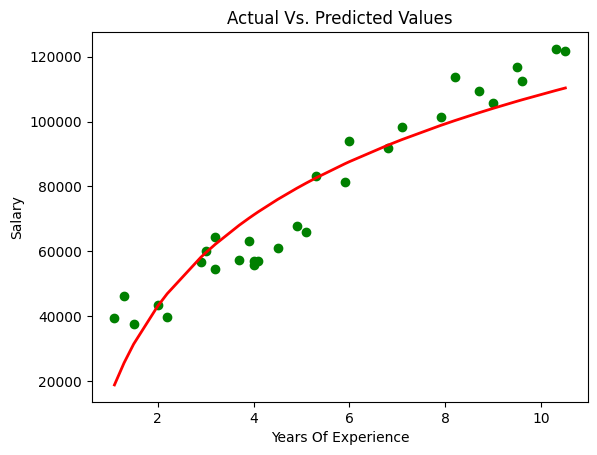

In [30]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data1.YearsExperience, data1.Salary,  color='green')
plt.plot(data1.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.4374194094941122
Residuals are normally distributed


<ipython-input-32-eb221585def4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


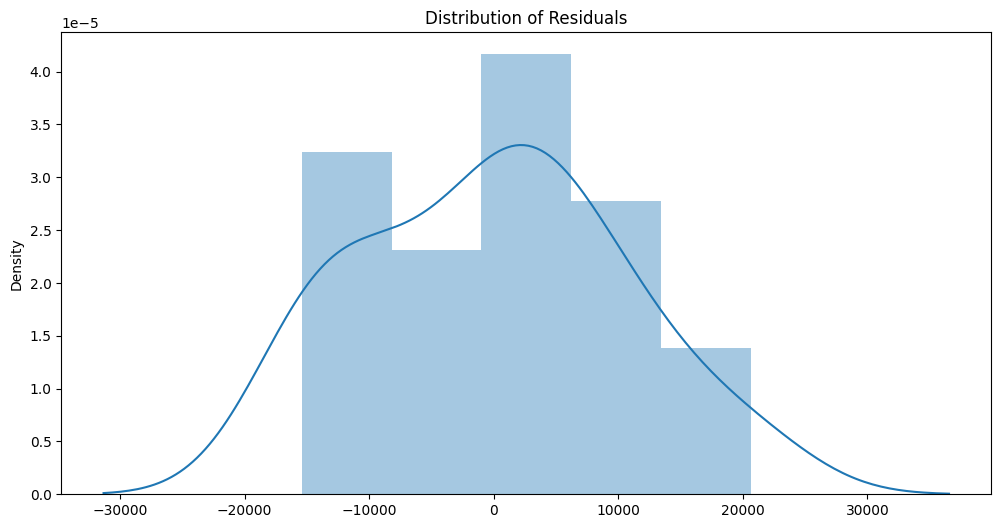

In [32]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()